In [34]:
import torch
from PIL import Image
from torchvision import tv_tensors
import matplotlib.pyplot as plt
import torchvision.transforms as v2
from torchvision.transforms.functional import center_crop
from converters import GID15Converter

In [22]:
def crop(image, y, x):
    return v2.functional.crop(image, y, x, 224, 224)
def plot(image):
    plt.imshow(image.permute(1,2,0))
    plt.show()
def ccrop(image):
    return center_crop(image, (112,112))

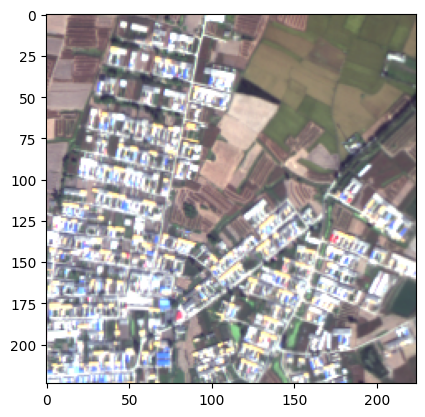

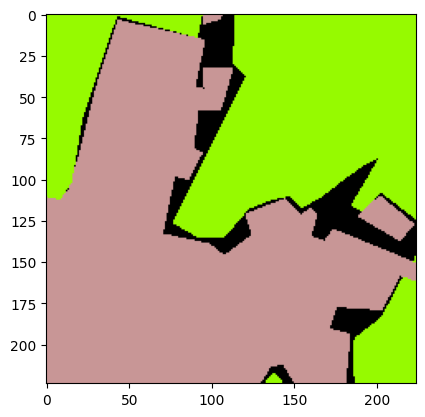

In [54]:
path = "D:\\Datasets\\GID15_test\\Validation\\Image__8bit_NirRGB\\GF2_PMS1__L1A0001064454-MSS1.tif"
gt = "D:\\Datasets\\GID15_test\\Validation\\Annotation__color\\GF2_PMS1__L1A0001064454-MSS1_15label.tif"
p = 224
tlx, tly = 1500, 1500
image = tv_tensors.Image(Image.open(path))
sample_patch = v2.functional.crop(image, tly, tlx, p, p)
plt.imshow(sample_patch.permute(1,2,0))
plt.show()

gt = tv_tensors.Image(Image.open(gt))
sample_gt = v2.functional.crop(gt, tly, tlx, p, p)
plt.imshow(sample_gt.permute(1,2,0))
plt.show()


shift = p//2
ulx, uly = tlx-shift, tly-shift
urx, ury = tlx+shift, tly-shift
dlx, dly = tlx-shift, tly+shift
drx, dry = tlx+shift, tly+shift
ul, ur, dl, dr = [crop(image, *coords) for coords in [(uly,ulx), (ury, urx), (dly,dlx), (dry,drx)]]
context = v2.functional.crop(image, tly-shift, tlx-shift, p*2, p*2)
t9, t6, t8, t7 = [ccrop(x) for x in (ul, ur, dl, dr)]

In [ ]:
import utils
config = {
	"net": "Unetv2",
	"load_checkpoint": "D:\\weights\\checkpoint8",
	"device": "gpu",
	"num_classes": 15,
}
device = utils.load_device(config)
net = utils.load_network(config, device)
utils.load_checkpoint(config, net)

In [56]:
def predict(net, sample_patch):
	converter = GID15Converter()
	output = net(sample_patch.unsqueeze(0).type(torch.float32).to(device))            
	pred_index = torch.argmax(output.squeeze().permute(1,2,0).cpu(), dim=2)
	center_mask = ((converter.iconvert(pred_index)*255).type(torch.uint8)).numpy()
	center_mask = Image.fromarray(center_mask)
	return center_mask

In [65]:
center = predict(net, sample_patch)
center.show()

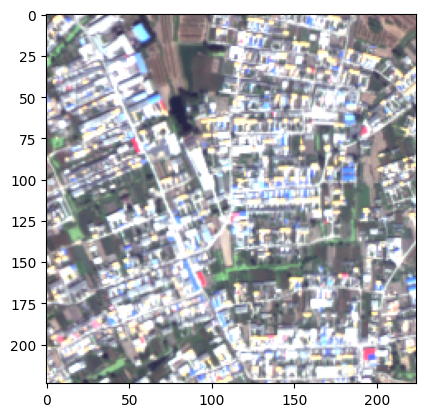

In [64]:

pdr = predict(net, dr)
pdl = predict(net, dl)
pur = predict(net, ur)
pul = predict(net, ul)
pur.show()
pul.show()
pdl.show()
pdr.show()

plot(dl)


In [51]:
center_mask.show()